# Projet Data Mining

## Affichage des données
On regarde les données dans un tableur, puis on les affiches sur une carte avec Folium. On les mets dans un Dataframe pour pouvoir les traiter plus facilement.
On remarque que pour certaines données, il manque le titre ou les tags, mais que le reste des informations sont toujours présente. Egalement, certaines photos proviennent du même post, et présentent donc le même titre, la même date d'upload, voir même la même localisation.


In [1]:
# installation of required libraries and dependencies
# numeric calculations
! pip install numpy==1.26.0 
# data frames 
! pip install pandas==2.1.1 
# machine learning algorithms 
! pip install scikit-learn==1.5.1 
! pip install scipy==1.12.0
# plotting 
! pip install plotly==5.24.1 
! pip install matplotlib==3.8.0 
! pip install seaborn==0.13.2 
! pip install plotly-express==0.4.1 
! pip install chart-studio==1.1.0 
# web app library 
! pip install streamlit==1.37.1 
# association rules
! pip install mlxtend==0.23.3

! pip install nbformat==5.9.2 

! pip install folium

! pip install nltk

! pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import folium
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
m = folium.Map(location=[45.6,5])

In [4]:
df_sample = pd.read_csv('flickr_data2_sample.csv')
df_sample.columns = df_sample.columns.str.strip()

for _, row in df_sample.iterrows():
    folium.Marker(
        location=[row['lat'], row['long']],
        popup=row['title']
    ).add_to(m)


On étudie les valeurs sur le jeu de données

In [5]:
df = pd.read_csv('flickr_data2.csv')
df.columns = df.columns.str.strip()
df = df.sample(n=20000, random_state=1)

C:\Users\amaur\AppData\Local\Temp\ipykernel_16072\444921755.py:1: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('flickr_data2.csv')


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 52249 to 192236
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  20000 non-null  int64  
 1   user                20000 non-null  object 
 2   lat                 20000 non-null  float64
 3   long                20000 non-null  float64
 4   tags                14972 non-null  object 
 5   title               18233 non-null  object 
 6   date_taken_minute   20000 non-null  float64
 7   date_taken_hour     20000 non-null  int64  
 8   date_taken_day      20000 non-null  int64  
 9   date_taken_month    20000 non-null  int64  
 10  date_taken_year     20000 non-null  int64  
 11  date_upload_minute  20000 non-null  object 
 12  date_upload_hour    20000 non-null  object 
 13  date_upload_day     20000 non-null  float64
 14  date_upload_month   20000 non-null  int64  
 15  date_upload_year    20000 non-null  float64
 16  Unna

In [7]:
df.isna()

,id,user,lat,long,tags,title,date_taken_minute,date_taken_hour,date_taken_day,date_taken_month,date_taken_year,date_upload_minute,date_upload_hour,date_upload_day,date_upload_month,date_upload_year,Unnamed: 16,Unnamed: 17,Unnamed: 18
52249,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,True
318168,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
124727,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
381865,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,True
415257,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84071,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
299092,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
92419,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
195214,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,True,True


On remarque qu'il y a un problème pour quelques lignes, avec des colonnes unamed qui compte 144 lignes, et une ou deux valeurs manquantes pour des dates de prises de d'upload

In [8]:
df[df[["Unnamed: 16"]].notnull().any(axis=1)]

,id,user,lat,long,tags,title,date_taken_minute,date_taken_hour,date_taken_day,date_taken_month,date_taken_year,date_upload_minute,date_upload_hour,date_upload_day,date_upload_month,date_upload_year,Unnamed: 16,Unnamed: 17,Unnamed: 18
275259,27349420444,14902008@N02,45.760071,4.826847,"france,lyon,monuments,vieuxlyon",1664 - auprès de ma blonde,2016.0,43,17,27,6,-) (A16-0651),27,18.0,28,6.0,2016.0,NaN,NaN
278435,28598912126,143241100@N07,45.767500,4.827870,"instagramapp,square,squareformat,iphoneography...",It's #Time,2016.0,42,8,29,7,Lets #Burn those #Bridges. Http://www.Joshua...,42,17.0,29,7.0,2016.0,NaN,NaN
237413,19640268305,29262809@N08,45.777191,4.855163,"france,rhône,villages,tourisme,villes,filoer",Lyon - Le Parc de la Tête d'Or,2015.0,15,17,9,7,le tadorne (2015 07 09),36,21.0,12,7.0,2015.0,NaN,NaN
282273,28928383473,142707355@N06,45.772500,4.831666,NaN,Vue depuis,2016.0,5,16,3,9,La croix rousse,11,1.0,9,9.0,2016.0,NaN,NaN
286907,29261452400,142707355@N06,45.764722,4.833055,NaN,Ouvertures chrétiennes,2016.0,49,12,3,9,Eglise Saint-nizier,11,1.0,9,9.0,2016.0,NaN,NaN


In [9]:
df[df[["Unnamed: 17"]].notnull().any(axis=1)]

,id,user,lat,long,tags,title,date_taken_minute,date_taken_hour,date_taken_day,date_taken_month,date_taken_year,date_upload_minute,date_upload_hour,date_upload_day,date_upload_month,date_upload_year,Unnamed: 16,Unnamed: 17,Unnamed: 18


In [10]:
df[df[["Unnamed: 18"]].notnull().any(axis=1)]

,id,user,lat,long,tags,title,date_taken_minute,date_taken_hour,date_taken_day,date_taken_month,date_taken_year,date_upload_minute,date_upload_hour,date_upload_day,date_upload_month,date_upload_year,Unnamed: 16,Unnamed: 17,Unnamed: 18


On observe qu'il y a sur certaines lignes un décallage, qui fait qu'il y a plus de colonne. Cela s'accompagne d'un mauvais formatage des dates.

## Pré-processing des données
On enlève les duplicats du jeu de données.
On peut considérer comme duplicat évident le cas ou l'id de la photo est le même.
On enlève aussi les données qui ont des problèmes, en particulier au niveau du formattage des dates, tels qu'identifiés plus tôt.

In [11]:
df_cleaned = df
df_cleaned = df_cleaned.drop_duplicates(keep='first')

df_cleaned = df_cleaned[df_cleaned[["Unnamed: 16"]].isnull().any(axis=1)]
df_cleaned = df_cleaned[df_cleaned[["Unnamed: 17"]].isnull().any(axis=1)]
df_cleaned = df_cleaned[df_cleaned[["Unnamed: 18"]].isnull().any(axis=1)]
df_cleaned = df_cleaned.dropna(axis=1, how='all')
df_cleaned = df_cleaned[df_cleaned[["date_upload_year"]].notna().any(axis=1)]
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19223 entries, 52249 to 192236
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  19223 non-null  int64  
 1   user                19223 non-null  object 
 2   lat                 19223 non-null  float64
 3   long                19223 non-null  float64
 4   tags                14392 non-null  object 
 5   title               17528 non-null  object 
 6   date_taken_minute   19223 non-null  float64
 7   date_taken_hour     19223 non-null  int64  
 8   date_taken_day      19223 non-null  int64  
 9   date_taken_month    19223 non-null  int64  
 10  date_taken_year     19223 non-null  int64  
 11  date_upload_minute  19223 non-null  object 
 12  date_upload_hour    19223 non-null  object 
 13  date_upload_day     19223 non-null  float64
 14  date_upload_month   19223 non-null  int64  
 15  date_upload_year    19223 non-null  float64
dtypes: f

On a supprimer tout les duplicats et les nulls au niveau des dates. On regarde maintenant la consistance des données à ce niveau.
On vérifie que les minutes ne dépassent pas 60, que les heures ne dépassent pas 24, que le numéro du jour ne dépasse pas 31, que le mois ne dépasse pas 12, et que la photo n'ai pas été prise avant l'invention de la photographie numérique par Steven Sasson en 1975 et mise en ligne avant l'invention du World Wide Web par Tim Berners-Lee en 1989.

In [12]:
df_cleaned['date_taken_minute'] = pd.to_numeric(df_cleaned['date_taken_minute'], errors='coerce')
df_cleaned['date_taken_hour'] = pd.to_numeric(df_cleaned['date_taken_hour'], errors='coerce')
df_cleaned['date_taken_day'] = pd.to_numeric(df_cleaned['date_taken_day'], errors='coerce')
df_cleaned['date_taken_month'] = pd.to_numeric(df_cleaned['date_taken_month'], errors='coerce')
df_cleaned['date_taken_year'] = pd.to_numeric(df_cleaned['date_taken_year'], errors='coerce')

df_cleaned['date_upload_minute'] = pd.to_numeric(df_cleaned['date_upload_minute'], errors='coerce')
df_cleaned['date_upload_hour'] = pd.to_numeric(df_cleaned['date_upload_hour'], errors='coerce')
df_cleaned['date_upload_day'] = pd.to_numeric(df_cleaned['date_upload_day'], errors='coerce')
df_cleaned['date_upload_month'] = pd.to_numeric(df_cleaned['date_upload_month'], errors='coerce')
df_cleaned['date_upload_year'] = pd.to_numeric(df_cleaned['date_upload_year'], errors='coerce')

df_cleaned = df_cleaned.drop(df_cleaned[df_cleaned['date_taken_minute'] > 60].index)
df_cleaned = df_cleaned.drop(df_cleaned[df_cleaned['date_taken_hour'] > 24].index)
df_cleaned = df_cleaned.drop(df_cleaned[df_cleaned['date_taken_day'] > 31].index)
df_cleaned = df_cleaned.drop(df_cleaned[df_cleaned['date_taken_month'] > 12].index)
df_cleaned = df_cleaned.drop(df_cleaned[df_cleaned['date_taken_year'] < 1975].index)

df_cleaned = df_cleaned.drop(df_cleaned[df_cleaned['date_upload_minute'] > 60].index)
df_cleaned = df_cleaned.drop(df_cleaned[df_cleaned['date_upload_hour'] > 24].index)
df_cleaned = df_cleaned.drop(df_cleaned[df_cleaned['date_upload_day'] > 31].index)
df_cleaned = df_cleaned.drop(df_cleaned[df_cleaned['date_upload_month'] > 12].index)
df_cleaned = df_cleaned.drop(df_cleaned[df_cleaned['date_upload_year'] < 1989].index)


df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19219 entries, 52249 to 192236
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  19219 non-null  int64  
 1   user                19219 non-null  object 
 2   lat                 19219 non-null  float64
 3   long                19219 non-null  float64
 4   tags                14388 non-null  object 
 5   title               17524 non-null  object 
 6   date_taken_minute   19219 non-null  float64
 7   date_taken_hour     19219 non-null  int64  
 8   date_taken_day      19219 non-null  int64  
 9   date_taken_month    19219 non-null  int64  
 10  date_taken_year     19219 non-null  int64  
 11  date_upload_minute  19219 non-null  float64
 12  date_upload_hour    19219 non-null  int64  
 13  date_upload_day     19219 non-null  float64
 14  date_upload_month   19219 non-null  int64  
 15  date_upload_year    19219 non-null  float64
dtypes: f

Cette étape nous permet de supprimer 25 résultats.
Les colonnes sont également converties pour correspondre à un format numérique adéquat.

Enfin, on regroupe les images prises par le même utilisateur aux mêmes coordonnées géographique, pour éviter qu'une série de photo postés fausse le clustering

In [14]:
def concatenate_values(series):
    return ', '.join(series.dropna().unique())

df_cleaned = df_cleaned.groupby(['lat', 'long', 'user']).agg({
    'tags': concatenate_values,
    'title': concatenate_values,
    'id': 'first',
    'date_taken_minute': 'first',
    'date_taken_hour': 'first',
    'date_taken_day': 'first',
    'date_taken_month': 'first',
    'date_taken_year': 'first',
    'date_upload_minute': 'first',
    'date_upload_hour': 'first',
    'date_upload_day': 'first',
    'date_upload_month': 'first',
    'date_upload_year': 'first'
}).reset_index()

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11834 entries, 0 to 11833
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   lat                 11834 non-null  float64
 1   long                11834 non-null  float64
 2   user                11834 non-null  object 
 3   tags                11834 non-null  object 
 4   title               11834 non-null  object 
 5   id                  11834 non-null  int64  
 6   date_taken_minute   11834 non-null  float64
 7   date_taken_hour     11834 non-null  int64  
 8   date_taken_day      11834 non-null  int64  
 9   date_taken_month    11834 non-null  int64  
 10  date_taken_year     11834 non-null  int64  
 11  date_upload_minute  11834 non-null  float64
 12  date_upload_hour    11834 non-null  int64  
 13  date_upload_day     11834 non-null  float64
 14  date_upload_month   11834 non-null  int64  
 15  date_upload_year    11834 non-null  float64
dtypes: f

In [15]:
m = folium.Map(location=[45.6,5])
for _, row in df_cleaned.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['long']],
        radius=1,
        fill=True
    ).add_to(m)

m.save("map1.html")

Dans un premier temps, nous allons nous concentrer sur la latitude et la longitude pour effectuer le  clustering

## Préparation des données pour le clustering

On supprime les colonnes inutiles pour ne garder que longitude et latitude pour le moment.

In [16]:
df_clustering = pd.DataFrame(data=df_cleaned)

df_clustering = df_clustering.drop(['id','user','tags','title','date_taken_minute','date_taken_hour','date_taken_day','date_taken_month','date_taken_year','date_upload_minute','date_upload_hour','date_upload_day','date_upload_month','date_upload_year'], axis=1)

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_clustering)
# show
print(scaled_data)
# create a DataFrame
scaled_data_df = pd.DataFrame(data=scaled_data, columns=df_clustering.columns)
scaled_data_df.head()

[[-5.46619147  2.33878163]
 [-5.21365877 -0.44178603]
 [-5.14203491  2.07734114]
 ...
 [ 4.62027094  1.21927813]
 [ 4.6356896   1.06923925]
 [ 4.69022791  0.8621841 ]]


,lat,long
0,-5.466191,2.338782
1,-5.213659,-0.441786
2,-5.142035,2.077341
3,-5.052961,1.808309
4,-5.047491,1.910727


## K Means

On utilise Elbow method pour déterminer graphiquement le nombre de cluster k

In [19]:
# k-means
from sklearn.cluster import KMeans

In [20]:
# number of clusters 
k = 50
# create a model
kmeans = KMeans(n_clusters=k, init='k-means++')
# fit scaled data
kmeans.fit(scaled_data_df)

KMeans(n_clusters=50)

In [21]:
# associated cluster labels
labels = kmeans.labels_
print(f"k-means labels: {labels}")

k-means labels: [32 16 32 ... 29 29 29]


In [22]:
# sum of squared distances
inertia = kmeans.inertia_
print(f"Sum of squared distances: {inertia}")

Sum of squared distances: 536.4491192753753


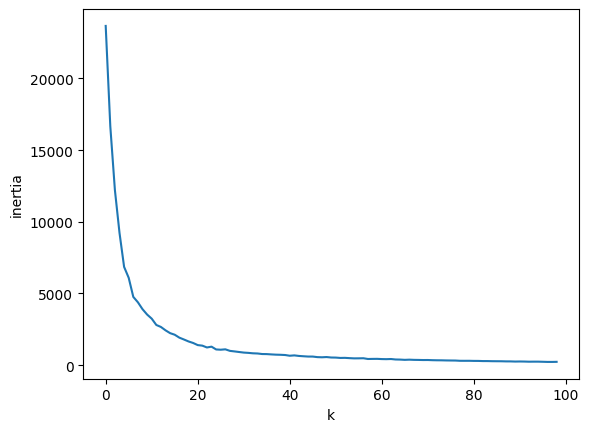

In [23]:
values=[]
for k in range(1,100):
    kmeans = KMeans(n_clusters=k, init='k-means++')
    kmeans.fit(scaled_data_df)
    labels = kmeans.labels_
    inertia = kmeans.inertia_
    values.append(inertia)
plt.plot(values)
plt.xlabel("k")
plt.ylabel("inertia")
plt.show()

A vue d'oeil, la valeur optimale de k est aux alentours de 25.

In [24]:
# number of clusters 
k = 25
# create a model
kmeans = KMeans(n_clusters=k, init='k-means++')
# fit scaled data
kmeans.fit(scaled_data_df)

labels = kmeans.labels_
print(f"k-means labels: {labels}")

k-means labels: [20 20 20 ...  3  3  3]


In [25]:
df_cleaned["KMeans"] = labels

In [26]:
colors = [
    'red', 'blue', 'green', 'yellow', 'pink', 'orange', 'cyan', 'magenta', 'grey',
    'darkred', 'darkblue', 'darkgreen', 'darkyellow', 'darkpink', 'darkorange', 'darkcyan', 'darkmagenta', 'darkgrey',
    'lightred', 'lightblue', 'lightgreen', 'lightyellow', 'lightpink', 'lightorange', 'lightcyan', 'lightmagenta',
    'purple', 'darkpurple', 'lightpurple', 'brown', 'darkbrown', 'lightbrown', 'beige', 'black', 'white', 
    'gold', 'silver', 'bronze', 'lime', 'teal', 'navy', 'maroon', 'olive', 'turquoise', 'indigo', 
    'violet', 'chocolate', 'coral', 'salmon', 'khaki', 'plum', 'orchid', 'tan', 'lavender', 'peach',
    'sienna', 'azure', 'amber', 'apricot', 'chartreuse', 'periwinkle', 'seagreen', 'forestgreen', 
    'skyblue', 'dodgerblue', 'midnightblue', 'steelblue', 'slateblue', 'powderblue', 'rosybrown', 
    'firebrick', 'goldenrod', 'crimson', 'tomato', 'hotpink', 'deepskyblue', 'royalblue', 
    'lawngreen', 'springgreen', 'mediumseagreen', 'darkslategrey', 'lightslategrey', 
    'mediumaquamarine', 'lightseagreen', 'darkkhaki', 'darkorchid', 'lightsalmon', 
    'darkgoldenrod', 'darkturquoise', 'darkviolet', 'mediumspringgreen', 'mediumslateblue',
    'palegoldenrod', 'paleturquoise', 'palevioletred', 'mediumvioletred', 'mediumblue'
]



In [27]:
m = folium.Map(location=[45.6,5])
for _, row in df_cleaned.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['long']],
        radius=5,
        color=colors[row['KMeans']],
        fill=True
    ).add_to(m)


m.save("map2.html")

k means ne semble pas être une très bonne option. Il propose un clustering qui n'est pas réaliste. On se retrouve avec des points éloignés mis ensembles, et avec des zones proche qui sont séparés. Par exemple, Sathonay et Vaulx en velin sont dans le même cluster, mais l'Est et l'Ouest de la place Bellecour ne sont pas dans le même cluster.

## Hierarchical clustering

In [28]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

On prend le même nombre de clusters que kmeans pour pouvoir comparer les deux

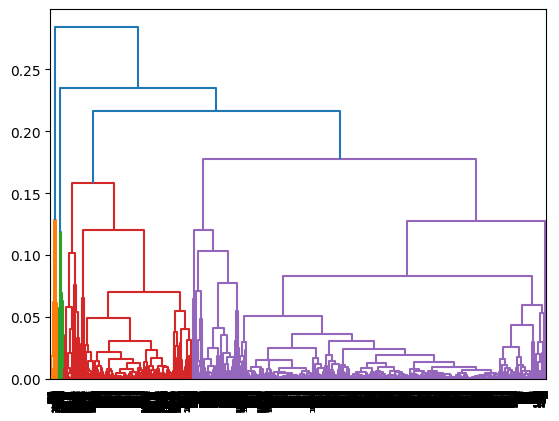

In [29]:
# Perform Agglomerative Clustering
clustering = AgglomerativeClustering(n_clusters=25).fit(df_clustering)

# Get the cluster labels
labels = clustering.labels_

# If you're also using the linkage and dendrogram
Z = hierarchy.linkage(df_clustering, 'complete')
dn = hierarchy.dendrogram(Z)

In [30]:
df_cleaned["Hierarchical"] = labels

In [31]:
m = folium.Map(location=[45.6,5])
for _, row in df_cleaned.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['long']],
        radius=5,
        color=colors[row['Hierarchical']],
        fill=True
    ).add_to(m)


m.save("map3.html")

C'est un peu mieux, le clustering est plus pertinent, mais il y a toujours des endroits qui ne devraient pas être ensemble (comme croix rousse et tête d'or)

## DB Scan

In [32]:
# DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, silhouette_samples
import numpy as np

In [33]:
X = StandardScaler().fit_transform(scaled_data_df)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.015, min_samples=30)
labels = dbscan.fit_predict(X)

df_cleaned["DBScan"] = labels

In [34]:
m = folium.Map(location=[45.6,5])
for _, row in df_cleaned.iterrows():
    if row['DBScan'] != -1:
        folium.CircleMarker(
            location=[row['lat'], row['long']],
            radius=5,
            color=colors[row['DBScan']],
            fill=True
        ).add_to(m)


m.save("map4.html")

On constate que DBScan est bien plus convaincant car il permet d'éliminer de nombreux points qui n'apparaissent dans aucun cluster. C'est la méthode DBScan que nous utiliserons par la suite.

### Interprétation des résultats

Grâce à cette analyse, on peut déterminer efficacement les points d'intérêt de la métropole de Lyon.

Comme on pouvait s'y attendre, les sites touristiques notables tels que la Cathédrale de Fourvière ou encore le vieux Lyon sont beaucoup photographiés. La majorité des photos sont prises dans le vieux Lyon et sur la Presqu'Île (de Bellecour à Hôtel de Ville).
Les quais du Rhone et le pont Bonaparte possèdent également un grand intérêt, dù au cadre aquatique qu'ils proposent.

En dehors du Centre Ville, il y a beaucoup moins de centres d'intérêts. On peut néanmoins souligner la Cité Internationale, le Parc de la Tête d'Or ou encore l'INSA Lyon qui présente deux clusters distincts.

Afin d'améliorer l'expérience des touristes, il faut concentrer les efforts sur le maintien et l'amélioration des transports en commun à la Cathédrale de Fourvière, le Vieux Lyon et la Presqu'Île.

## Text-Pattern Mining

On utilise un nuage de mot pour voir les mots les plus fréquents, et pour pouvoir nettoyer si un mot reviens très souvent mais n'est pas pertinent

In [35]:
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize

In [36]:

def show_word_cloud(li):
    text = " ".join(row for row in li if isinstance(row, str))

    wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [37]:
import nltk
from nltk.corpus import stopwords

In [38]:
nltk.download('stopwords')

stop_words = set(stopwords.words('french'))
stop_words_en = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amaur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


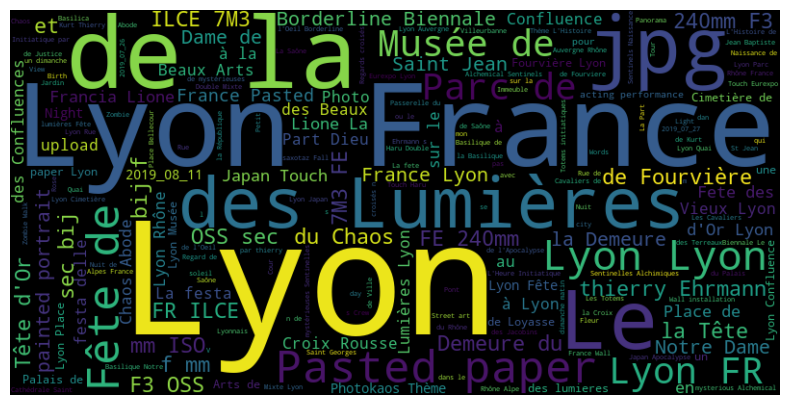

In [39]:
word_token = [word_tokenize(row, preserve_line=True) for row in df_cleaned['title'] if isinstance(row, str)]
word_token_list = [item for sublist in word_token for item in sublist]
show_word_cloud(word_token_list)

On affiche les mots les plus présents dans les titres. On constate la présence de certains mots qui ne nous permettront pas d'effectuer une analyse précise.

On devra donc filtrer la liste de mots actuelle pour obtenir une liste de mots étudiable.

In [40]:
trash_words = {'lyon', 'france', "'s", 'photo', ".jpg", '@', ',', '(', ')', "!", ":", '?', '-', "'m", ';'}
for i in stop_words:
    trash_words.add(i)
for i in stop_words_en:
    trash_words.add(i)

print(trash_words)

{'!', 'ont', 'which', 'avait', 'had', 'eut', 'now', 'c', 'eue', 's', "mightn't", 'ta', 'it', 'ain', 'below', 'et', 'couldn', 'and', 'eus', 'just', 'eu', 'am', 'o', 'myself', 'sur', 'étais', 'won', "'m", 'mon', 'such', 'until', 'furent', 'auront', "weren't", "you've", 'seront', 'he', 'soyez', 'in', 'auras', 'par', 'no', 'soyons', 'étante', "you'll", 'off', 'a', 'when', 'la', 'under', 'avec', 'soient', 'aurais', 'will', 'doesn', 'suis', 'pas', 'me', ':', 'during', 'if', 'm', 'hasn', 'seraient', 'une', 'can', 'aura', 'once', 'serons', 'l', 'ours', 'weren', 'were', 'ayons', 'ce', 'how', 'you', "that'll", 'more', 'themselves', 'étantes', 'some', "won't", 'is', 'being', 'as', 'so', 'seriez', 'my', 'each', 'toi', 'all', 't', 'fussions', 'eussent', 'over', 'don', "should've", 'il', 'fus', "hadn't", 'out', "needn't", 'serais', 'fusse', 'fut', 'fûmes', 'haven', "you'd", 'au', 'ourselves', 'its', 'having', 'des', 'theirs', 'ton', 'up', "aren't", 'needn', 'vos', 'avions', 'between', 'n', 'not', "h

On ajoute certains mots à la liste des mots ignorés, notamment Lyon, France et photo qui s'appliquent à toutes les photos de notre base de données.

On ajoute également certains caractères de ponctuation.

In [41]:
filtered_tokens = []
for i in word_token_list:
    if i.lower() not in trash_words and ".jpg" not in i.lower():
        filtered_tokens.append(i)
print(filtered_tokens)

['Pâquerette', 'Guêpes', 'Sursis', 'Z2', 'entre', 'Givors', 'Noël', 'brouillard', 'dissipe', '...', 'DSCF1143', 'Perles', "d'eau", 'Brouillard', "d'hiver", 'DSCF1178', 'DSCF1147', 'Paquerettes', 'Baies', 'Brouillard', 'DSCF1201', 'soleil', 'cache', 'Nuit', 'étoilée', 'DSC_0061', 'DSC_0015', 'DSC_0054', 'Sellettes', 'DSCF8798', 'DSCF8809', 'TER', '2N', '631', 'BB', '22309', 'Feyzin', 'dark', 'point', '69-Feyzin', '*', 'Raffinerie', 'Feyzin', 'Die', 'Raffinerien', 'meiner', 'Kindheit', '1/2', 'Tulipe', 'Rue', 'marcel', 'Merieux', 'ZI', 'corbas', 'si', 'jouait', 'grumz', 'Bon', 'prochaine', 'fois', 'cette', 'salle', 'pense', 'prendre', '35mm', '#', 'epiceriemoderne', 'Radio', 'Elvis', "l'epicerie", 'Moderne', '69', '27/03/19', 'JL', 'Prades', 'Reversed', 'Low', 'Radio', 'Elvis', "l'epicerie", 'Moderne', '69', '27/03/19', 'TvB', 'Kurt', 'Vile', '&', 'Violators', "L'Épicerie", 'Moderne', '21/11/15', 'Radio', 'Elvis', "l'epicerie", 'Moderne', '69', '27/03/19', '♫', 'Dj', 'Krush', 'live', 'Ep

On enlève également les fichiers dont le nom contient ".jpg". On considère que l'utilisateur n'a pas renommé le fichier et le nom de fichier de nous fournira alors aucune information intéressante.

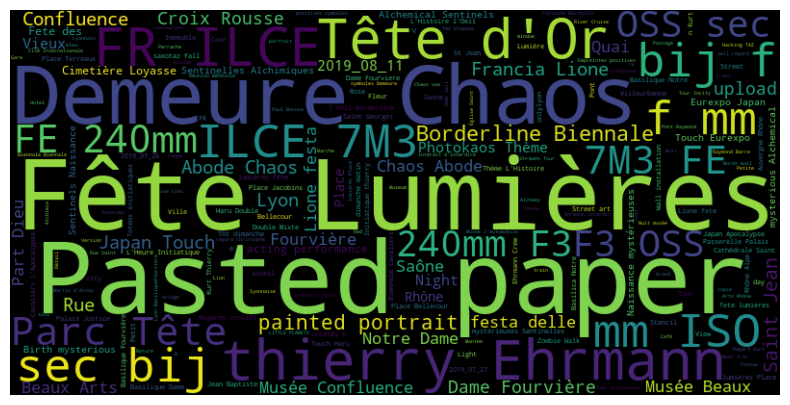

In [42]:
show_word_cloud(filtered_tokens)

On obtient désormais une liste de mots que nous pourrons utiliser pour notre analyse.

In [43]:
def clean_word_row(row):
    clean = []
    if isinstance(row, str):
        t = word_tokenize(row, preserve_line=True) 
        for i in t:
            if i.lower() not in trash_words and ".jpg" not in i.lower() and not any(char.isdigit() for char in i):
                clean.append(i)
    return " ".join(clean)
df_cleaned["words"] = [clean_word_row(i) for i in df_cleaned["title"]]

On utilise TF IDF

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [45]:
# Fusionner les mots par cluster
df_grouped = df_cleaned.groupby('DBScan')['words'].apply(lambda x: ' '.join(x)).reset_index()

# Appliquer TF-IDF
vectorizer = TfidfVectorizer(max_df=0.5, min_df=2)
X = vectorizer.fit_transform(df_grouped['words'])

# Extraire les mots-clés
feature_names = vectorizer.get_feature_names_out()
top_n = 5  # Nombre de mots-clés à extraire
cluster_keywords = {}

for i, cluster in enumerate(df_grouped['DBScan']):
    scores = X[i].toarray().flatten()
    top_words = [feature_names[idx] for idx in scores.argsort()[-top_n:][::-1]]
    cluster_keywords[cluster] = ', '.join(top_words)

# Ajouter les noms de clusters au DataFrame original
df_cleaned['nom_cluster'] = df_cleaned['DBScan'].map(cluster_keywords)

# Vérification du résultat
print(df_cleaned[['DBScan', 'nom_cluster']].drop_duplicates())

       DBScan                                        nom_cluster
0          -1                      paper, pasted, or, parc, tête
119         0               на, flottants, flowers, flux, follow
614         1           confluences, musée, confluence, iso, sec
987         2  biennale, mondes, flottants, confluence, sucrière
2685        3                bellecour, place, roue, grande, eos
2962        4             band, bellecour, lgbt, fiértés, marche
3540        5       bonaparte, pont, justice, passerelle, palais
3696        6            roman, nuits, fourvière, battle, romain
3714        7        célestins, théâtre, parking, printemps, lfl
3851        8              jean, st, cathédrale, vieux, baptiste
4131        9              république, place, hotel, auto, carpe
4206       10               jacobins, place, fontaine, génie, mm
4545       11               justice, palais, passerelle, fr, iso
5021       12         justice, palais, passerelle, weight, saône
5383       13       fourv

In [46]:
m = folium.Map(location=[45.6,5])
for _, row in df_cleaned.iterrows():
    if row['DBScan'] != -1:
        folium.CircleMarker(
            location=[row['lat'], row['long']],
            radius=5,
            color=colors[row['DBScan']],
            fill=True,
            popup=[row["nom_cluster"]]
        ).add_to(m)

m.save("map5.html")

On rajoutes les tags

In [47]:
df_cleaned["words2"] = [clean_word_row(i) for i in df_cleaned["tags"]]

# Fusionner les mots par cluster
df_grouped = df_cleaned.groupby('DBScan')['words2'].apply(lambda x: ' '.join(x)).reset_index()

# Appliquer TF-IDF
vectorizer = TfidfVectorizer(max_df=0.5, min_df=2)
X = vectorizer.fit_transform(df_grouped['words2'])

# Extraire les mots-clés
feature_names = vectorizer.get_feature_names_out()
top_n = 5  # Nombre de mots-clés à extraire
cluster_keywords = {}

for i, cluster in enumerate(df_grouped['DBScan']):
    scores = X[i].toarray().flatten()
    top_words = [feature_names[idx] for idx in scores.argsort()[-top_n:][::-1]]
    cluster_keywords[cluster] = ', '.join(top_words)

# Ajouter les noms de clusters au DataFrame original
df_cleaned['nom_cluster'] = df_cleaned['DBScan'].map(cluster_keywords)

# Vérification du résultat
print(df_cleaned[['DBScan', 'nom_cluster']].drop_duplicates())

       DBScan                                        nom_cluster
0          -1     streetart, croixrousse, collage, paper, pasted
119         0  프랑스, frau, frenchpolitician, frenchiboo, frenc...
614         1  muséedesconfluences, confluence, musée, conflu...
987         2  artcontemporain, lasucrière, sucrière, biennal...
2685        3  bellecour, placebellecour, place, roue, grande...
2962        4  bellecour, musicalinstrument, mand, retrato, r...
3540        5                   saône, river, pont, bridge, sang
3696        6       nuits, theatre, romain, concert, galloromain
3714        7  parking, celestins, célestins, théâtredescéles...
3851        8  vieuxlyon, cathédrale, saintjean, cathedral, c...
4131        9         exif, république, place, republique, apple
4206       10  jacobins, fontaine, placedesjacobins, fountain...
4545       11  palaisdejustice, passerelle, saône, passerelle...
5021       12  palaisdejustice, passerelledupalaisdejustice, ...
5383       13  fourvière,

In [48]:
m = folium.Map(location=[45.6,5])
for _, row in df_cleaned.iterrows():
    if row['DBScan'] != -1:
        folium.CircleMarker(
            location=[row['lat'], row['long']],
            radius=5,
            color=colors[row['DBScan']],
            fill=True,
            popup=[row["nom_cluster"]]
        ).add_to(m)


m.save("map6.html")

On obtient un nommage des clusters plutôt bon. On obtient les meilleurs résultats pour les lieux visités durant toute l'année comme Fourvière, le Vieux Lyon, les ponts, etc.

Là où le nommage des clusters est le moins efficace c'est aux endroit où la fréquentation dépend beaucoup de la période de l'année. Cela se voit beaucoup sur la Presqu'île avec le mot "lumières" notamment. On peut également noter l'importance du festival des 24h de l'INSA.

On regroupe les deux pour utiliser à la fois les titres et les tags pour le nommage des clusters

In [49]:
df_cleaned['word_total'] = df_cleaned['words'] + ' ' + df_cleaned['words2']

df_grouped = df_cleaned.groupby('DBScan')['word_total'].apply(lambda x: ' '.join(x)).reset_index()

# Appliquer TF-IDF
vectorizer = TfidfVectorizer(max_df=0.5, min_df=2)
X = vectorizer.fit_transform(df_grouped['word_total'])

# Extraire les mots-clés
feature_names = vectorizer.get_feature_names_out()
top_n = 5  # Nombre de mots-clés à extraire
cluster_keywords = {}

for i, cluster in enumerate(df_grouped['DBScan']):
    scores = X[i].toarray().flatten()
    top_words = [feature_names[idx] for idx in scores.argsort()[-top_n:][::-1]]
    cluster_keywords[cluster] = ', '.join(top_words)

# Ajouter les noms de clusters au DataFrame original
df_cleaned['nom_cluster'] = df_cleaned['DBScan'].map(cluster_keywords)

# Vérification du résultat
print(df_cleaned[['DBScan', 'nom_cluster']].drop_duplicates())

       DBScan                                        nom_cluster
0          -1        paper, pasted, streetart, croixrousse, parc
119         0             프랑스, francais, frau, franța, française
614         1  confluences, musée, confluence, muséedesconflu...
987         2  biennale, sucrière, artcontemporain, lasucrièr...
2685        3     bellecour, placebellecour, place, roue, grande
2962        4              bellecour, brass, trumpet, band, lgbt
3540        5         saône, pont, bonaparte, zombie, passerelle
3696        6             nuits, theatre, romain, roman, antique
3714        7  célestins, celestins, théâtre, parking, théâtr...
3851        8       cathédrale, vieuxlyon, st, vieux, primatiale
4131        9         république, place, exif, republique, hotel
4206       10  jacobins, fontaine, place, placedesjacobins, f...
4545       11  passerelle, justice, palais, palaisdejustice, ...
5021       12  justice, palais, passerelle, palaisdejustice, ...
5383       13        basi

In [50]:
m = folium.Map(location=[45.6,5])
for _, row in df_cleaned.iterrows():
    if row['DBScan'] != -1:
        folium.CircleMarker(
            location=[row['lat'], row['long']],
            radius=5,
            color=colors[row['DBScan']],
            fill=True,
            popup=[row["nom_cluster"]]
        ).add_to(m)

m.save("map7.html")

On utilise d'autres algos pour comparer.
On ne peut pas utiliser apriori, dans le cas du sample avec 20000 lignes, l'array ferait 60 Gb, ce qui cause une erreur.


In [50]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
df_cleaned['word_total_li'] = df_cleaned['word_total'].apply(lambda x: x.split())
cluster_groups = df_cleaned.groupby('DBScan')['word_total_li'].apply(list)

def apply_apriori(cluster_words, min_support=0.1):
    te = TransactionEncoder()
    te_ary = te.fit(cluster_words).transform(cluster_words)
    df = pd.DataFrame(te_ary, columns=te.columns_)
    frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)
    return frequent_itemsets

cluster_names = {}

for cluster_id, words in cluster_groups.items():
    try:
        frequent_itemsets = apply_apriori(words, min_support=0.1)
        
        if not frequent_itemsets.empty:
            most_frequent = frequent_itemsets.loc[frequent_itemsets['support'].idxmax()]
            cluster_names[cluster_id] = ', '.join(most_frequent['itemsets'])
        else:
            cluster_names[cluster_id] = 'Unnamed'
        
        print(f"Cluster {cluster_id}: {cluster_names[cluster_id]}")
    except MemoryError:
        print(f"MemoryError: Skipping cluster {cluster_id} due to size")
        cluster_names[cluster_id] = 'Unnamed (MemoryError)'

df_cleaned['nom_cluster'] = df_cleaned['DBScan'].map(cluster_names)



Cluster -1: Unnamed
Cluster 0: Unnamed
Cluster 1: Musée
Cluster 2: artcontemporain
Cluster 3: bellecour
Cluster 4: europe
Cluster 5: night
Cluster 6: Unnamed
Cluster 7: Célestins
Cluster 8: vieuxlyon
Cluster 9: République
Cluster 10: Jacobins
Cluster 11: rhône
Cluster 12: Palais
Cluster 13: Fourvière
Cluster 14: Unnamed
Cluster 15: musée
Cluster 16: Temple
Cluster 17: Nizier
Cluster 18: musée
Cluster 19: opéra
Cluster 20: Lyonnais
Cluster 21: croixrousse
Cluster 22: mac
MemoryError: Skipping cluster 23 due to size
Cluster 24: boardgame


In [52]:
m = folium.Map(location=[45.6,5])
for _, row in df_cleaned.iterrows():
    if row['DBScan'] != -1:
        folium.CircleMarker(
            location=[row['lat'], row['long']],
            radius=5,
            color=colors[row['DBScan']],
            fill=True,
            popup=[row["nom_cluster"]]
        ).add_to(m)


m.save("map8.html")

On observe que le résultat est moins convaincant, avec certains clusters qui n'ont pas de noms, et d'autres qui ont des noms qui ne semblent pas très pertinents. Cependant, certains clusters des zones touristiques donnent de très bon résultat (fourvière, bellecour, celestin, jacobins), même si d'autrs ne marchent pas (vieux lyon, ruines gallo romaines)

On essaie une variante avec les règles d'associations

In [ ]:
df_cleaned['word_total_li'] = df_cleaned['word_total'].apply(lambda x: x.split())

cluster_groups = df_cleaned.groupby('DBScan')['word_total_li'].apply(list)

def apply_association_rules(cluster_words, min_support=0.1, min_threshold=0.5):
    te = TransactionEncoder()
    te_ary = te.fit(cluster_words).transform(cluster_words)
    df = pd.DataFrame(te_ary, columns=te.columns_)

    if df.empty:
        return pd.DataFrame()
    
    frequent_itemsets = apriori(df, min_support=min_support, use_colnames=True)

    if frequent_itemsets.empty:
        return pd.DataFrame()

    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=min_threshold, num_itemsets=1)
    return rules

cluster_names = {}

for cluster_id, words in cluster_groups.items():
    try:
        if len(words) > 1:
            rules = apply_association_rules(words, min_support=0.1, min_threshold=0.5)
        else:
            cluster_names[cluster_id] = 'Unnamed (Not Enough Data)'

        
        if rules is not None and not rules.empty:
            best_rule = rules.loc[rules['lift'].idxmax()]
            antecedents = ', '.join(best_rule['antecedents'])
            consequents = ', '.join(best_rule['consequents'])
            cluster_names[cluster_id] = f"{antecedents}, {consequents}"
        else:
            cluster_names[cluster_id] = 'Unnamed'
        
        print(f"Cluster {cluster_id}: {cluster_names[cluster_id]}")
    except MemoryError:
        print(f"MemoryError: Skipping cluster {cluster_id} due to size")
        cluster_names[cluster_id] = 'Unnamed (MemoryError)'

df_cleaned['nom_cluster'] = df_cleaned['DBScan'].map(cluster_names)

In [ ]:
m = folium.Map(location=[45.6,5])
for _, row in df_cleaned.iterrows():
    if row['DBScan'] != -1:
        folium.CircleMarker(
            location=[row['lat'], row['long']],
            radius=5,
            color=colors[row['DBScan']],
            fill=True,
            popup=[row["nom_cluster"]]
        ).add_to(m)


m.save("map9.html")

Conclusion : les règles d'association ne sont vraiment pas très bonnes, on a quelques-uns qui sont bien, mais énormement de clusters mal ou non nommées.

## Analyse Temporelle

On va tout d'abord séparer les différents tags afin de pouvoir les analyser plus facilement.

In [51]:
df_exploded = df_cleaned.explode('words')
df_exploded = df_exploded[df_exploded['words'].str.strip() != '']

### Analyse Préalable

On affiche tout d'abord les 5 tags les plus populaires par mois pour se faire une idée des données.

In [52]:
tag_counts_by_month = df_exploded.groupby(['date_taken_month', 'words']).size().unstack(fill_value=0)

top_tags_per_month = tag_counts_by_month.apply(lambda x: x.nlargest(3).index.tolist(), axis=1)

print(top_tags_per_month)

date_taken_month
1                     [LITTLE PLANETS |, upload, EXT |]
2     [Ascie, Convention Tattoos piercings, Tôt dima...
3     [Tôt dimanche matin, Parc Tête d'Or, Pasted pa...
4                   [Pasted paper [ ], Avril, abstract]
5                          [--, Parc Tête d'Or, upload]
6     [Parc Tête d'Or, Marche fiértés LGBT, Fierté L...
7     [FR FE OSS sec. bij f mm ISO, Flux, Parc Tête ...
8      [halles paul bocuse, Confluence, Parc Tête d'Or]
9        [Zombie Walk, Zombie Walk Revolutions, upload]
10    [St Jean Croix rousse, Ldoll, Strikers Protest...
11    [Urba, November, Cimetière Loyasse Cazenove-Br...
12    [Fête Lumières, Francia Lione festa delle, Fêt...
dtype: object


On constate que, au-delà des noms de lieux importants, les différents évènements de l'année ont une grande influence sur nos données.

On retrouve par exemple "Avril", "Marche fiértés LGBT", "Zombie Walk", "November" et "Fête Lumières" qui correspondent tous à des évènements se passant sur une période précise de l'année.

On va maintenant chercher à déterminer quels tags sont les plus influencés par la période de l'année. On pourra après les supprimer des tags utilisés car ils ne représentent pas des centres d'intérêt constants dans le temps.

### Variabilité des tags (par mois)

On trie les tags par écart type (en nombre de fois que le tag est utilisé par mois).

In [53]:
tag_month_variability = tag_counts_by_month.std()

tags_most_variable_month = tag_month_variability.sort_values(ascending=False)

print(tags_most_variable_month.head(20))

words
FR FE OSS sec. bij f mm ISO                                35.507042
Fête Lumières                                              22.927257
--                                                          9.814955
Francia Lione festa delle                                   9.814955
Fête lumières                                               8.660254
EXT |                                                       5.961366
Parc Tête d'Or                                              4.999242
LITTLE PLANETS |                                            4.907477
Urba                                                        4.330127
Lumières                                                    4.041452
Flux                                                        3.752777
Zombie Walk                                                 3.729489
upload                                                      3.228660
St Jean Croix rousse                                        3.175426
FR FE OSS sec. bij f mm ISO 

On observe bien les tags remarqués précédemment comme "Fête Lumières" ou encore "Marche fiértés LGBT".

On va donc visualiser l'évolution de l'utilisation de certains de ces tags par mois.

On remarque cependant que certains tags apparaissent plusieurs fois alors que leur sens est le même. (Fête Lumières, Fête lumières, Lumières). Pour éviter ce problème on aurait pu lemmatiser les tags pour les regrouper selon leur sémantique.

In [54]:
tags_interet_month = ['Fête lumières', 'Marche fiértés LGBT', 'Zombie Walk Revolutions', 'LITTLE PLANETS |']

df_time_filtered_month = df_exploded[df_exploded['words'].isin(tags_interet_month)]
tag_counts_by_month = df_time_filtered_month.groupby(['date_taken_month', 'words']).size().unstack(fill_value=0)

all_months = np.arange(1, 13)
tag_counts_by_month = tag_counts_by_month.reindex(all_months, fill_value=0)

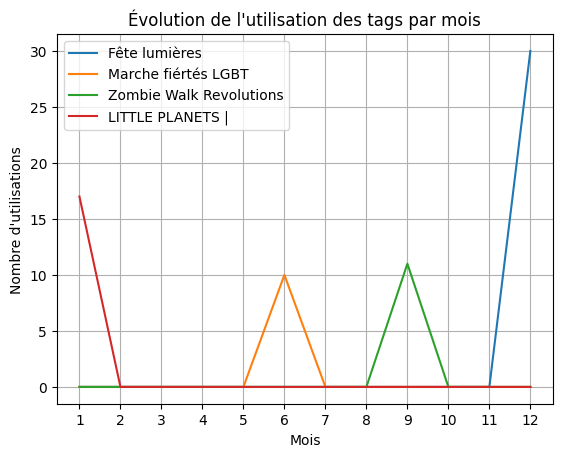

In [55]:
plt.figure()

for tag in tags_interet_month:
    plt.plot(tag_counts_by_month.index, tag_counts_by_month[tag])

plt.xlabel("Mois")
plt.ylabel("Nombre d'utilisations")
plt.title("Évolution de l'utilisation des tags par mois")
plt.xticks(range(1, 13))
plt.grid(True)
plt.legend(tags_interet_month)
plt.show()

On constate bel et bien que ces tags ne sont utilisés que lors de leur mois spécifique.
\
On peut alors considérer qu'il est intéressant d'exclure ces tags lors de notre analyse.

Avant de passer à l'exclusion de certains mots, on va effectuer la même analyse, mais par heure cette fois.

### Variabilité des tags (par heure)

On affiche d'abord les tags les plus populaires par heure.

In [56]:
tag_counts_by_hour = df_exploded.groupby(['date_taken_hour', 'words']).size().unstack(fill_value=0)
top_tags_per_hour = tag_counts_by_hour.apply(lambda x: x.nlargest(3).index.tolist(), axis=1)
print(top_tags_per_hour)

date_taken_hour
0      [Fête Lumières, Space invader [ ], Tour Oxygène]
1     [Fete lumieres, Fête lumières Rousse, # # # up...
2     [upload, Palais Bourse, # Paroisse # Catholiqu...
3     [Panorama Notre-Dame Fourvière #, upload, Basi...
4     [Concours mba_lyon onlylyon igerslyon. # selfi...
5     [Tôt dimanche matin, upload, # brocante # appa...
6          [Tôt dimanche matin, upload, -- Along river]
7     [St Jean Croix rousse, Tôt dimanche matin, upl...
8          [Tôt dimanche matin, Parc Tête d'Or, upload]
9                          [Parc Tête d'Or, --, upload]
10    [Parc Tête d'Or, FR FE OSS sec. bij f mm ISO, --]
11    [FR FE OSS sec. bij f mm ISO, Parc Tête d'Or, --]
12    [EXT |, FR FE OSS sec. bij f mm ISO, -- Road R...
13    [FR FE OSS sec. bij f mm ISO, Confluence, ... ...
14    [FR FE OSS sec. bij f mm ISO, -- Basilique Dam...
15    [FR FE OSS sec. bij f mm ISO, Pasted paper [ ]...
16    [Pasted paper [ ], FR FE OSS sec. bij f mm ISO...
17    [LITTLE PLANETS |, Pasted 

On affiche ensuite les tags dont la présence varie le plus selon l'heure.

In [57]:
tag_hour_variability = tag_counts_by_hour.std()
tags_most_variable_hour = tag_hour_variability.sort_values(ascending=False)
print(tags_most_variable_hour.head(20))

words
FR FE OSS sec. bij f mm ISO                                8.828376
Parc Tête d'Or                                             6.804597
Fête Lumières                                              5.616842
EXT |                                                      4.128155
LITTLE PLANETS |                                           3.470110
Pasted paper [ ]                                           3.120468
Fête lumières                                              3.025256
Francia Lione festa delle                                  3.020462
--                                                         3.006033
Tôt dimanche matin                                         2.377430
upload                                                     2.296816
Zombie Walk                                                2.211629
Confluence                                                 2.206299
-- Basilique Dame Fourviere                                2.041241
Zombie Walk Revolutions                   

In [58]:
tags_interet_hour = ["Parc Tête d'Or", 'Fête Lumières', 'Tôt dimanche matin', 'Confluence']

df_time_filtered_hour = df_exploded[df_exploded['words'].isin(tags_interet_hour)]
tag_counts_by_hour = df_time_filtered_hour.groupby(['date_taken_hour', 'words']).size().unstack(fill_value=0)

all_hours = np.arange(1, 25)
tag_counts_by_hour = tag_counts_by_hour.reindex(all_hours, fill_value=0)

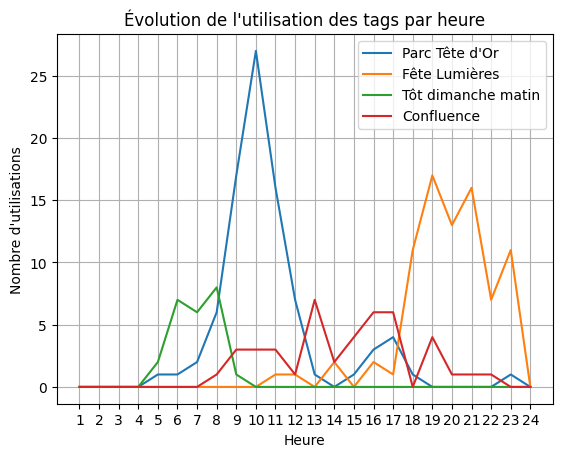

In [59]:
plt.figure()

for tag in tags_interet_hour:
    plt.plot(tag_counts_by_hour.index, tag_counts_by_hour[tag])

plt.xlabel("Heure")
plt.ylabel("Nombre d'utilisations")
plt.title("Évolution de l'utilisation des tags par heure")
plt.xticks(range(1, 25))
plt.grid(True)
plt.legend(tags_interet_hour)
plt.show()

Pour l'analyse temporelle, on constate que de nombreux tags sont souvent utilisés à une période précise de la journée.
\
Par exemple, "Fête Lumières" est surtout utilisé le soir, "Confluence" est utilisé plutôt dans l'après-midi et "Parc Tête d'Or" est utilisé le matin.

Ces tags nous donnent une bonne idée des habitudes des utilisateurs de l'application et peuvent nous aider à déterminer les horaires d'affluence de certains lieux importants.

### Exclusion des tags les plus variables

On va donc exclure les tags qui varient le plus en fonction du mois de l'année.

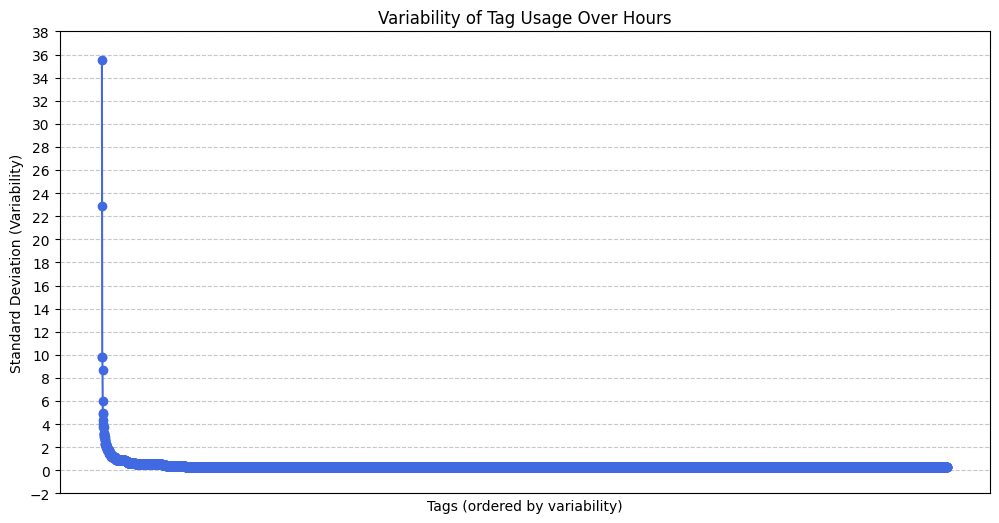

In [60]:
plt.figure(figsize=(12, 6))
x = np.arange(len(tags_most_variable_month))
plt.plot(x, tags_most_variable_month.values, marker='o', linestyle='-', color='royalblue')

plt.xlabel("Tags (ordered by variability)")
plt.ylabel("Standard Deviation (Variability)")
plt.title("Variability of Tag Usage Over Hours")
plt.xticks([])
plt.grid(axis='y', linestyle='--', alpha=0.7)

y_min, y_max = plt.ylim()
plt.yticks(np.arange(np.floor(y_min), np.ceil(y_max) + 1, 2))

plt.show()

Graphiquement, on détermine que l'on va exclure les valeurs pour lesquelles l'écart-type est plus grand que 1.00.

In [61]:
tags_to_keep = tag_month_variability[tag_month_variability <= 1.00].index

df_final = df_cleaned[df_cleaned['words'].apply(lambda tags: any(tag in tags_to_keep for tag in tags.split()))]

On effectue à nouveau DBScan sur le DataFrame obtenu.

### DBScan

In [62]:
df_clustering_final = pd.DataFrame(data=df_final)
df_clustering_final = df_clustering_final.drop(['id','user','tags','title','date_taken_minute','date_taken_hour','date_taken_day','date_taken_month','date_taken_year','date_upload_minute','date_upload_hour','date_upload_day','date_upload_month','date_upload_year','DBScan','words','nom_cluster','words2','word_total'], axis=1)

In [63]:
scaler_final = StandardScaler()
scaled_data_final = scaler_final.fit_transform(df_clustering_final)
scaled_data_df_final = pd.DataFrame(data=scaled_data_final, columns=df_clustering_final.columns)

In [64]:
X = StandardScaler().fit_transform(scaled_data_df_final)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.035, min_samples=30)  # Adjust eps and min_samples as needed
labels = dbscan.fit_predict(X)

# Add the cluster labels to the original DataFrame
df_final["DBScan-2"] = labels

C:\Users\amaur\AppData\Local\Temp\ipykernel_16072\2220153216.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["DBScan-2"] = labels


In [65]:
m = folium.Map(location=[45.6,5])
for _, row in df_final.iterrows():
    if row['DBScan-2'] != -1:
        folium.CircleMarker(
            location=[row['lat'], row['long']],
            radius=5,
            color=colors[row['DBScan-2']],
            fill=True
        ).add_to(m)


m.save("map10.html")

### Affichage du nom des clusters

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Fusionner les mots par cluster
df_grouped_final = df_final.groupby('DBScan-2')['words'].apply(lambda x: ' '.join(x)).reset_index()

# Appliquer TF-IDF
vectorizer = TfidfVectorizer(max_df=0.5, min_df=2)
X = vectorizer.fit_transform(df_grouped_final['words'])

# Extraire les mots-clés
feature_names = vectorizer.get_feature_names_out()
top_n = 5  # Nombre de mots-clés à extraire
cluster_keywords = {}

for i, cluster in enumerate(df_grouped_final['DBScan-2']):
    scores = X[i].toarray().flatten()
    top_words = [feature_names[idx] for idx in scores.argsort()[-top_n:][::-1]]
    cluster_keywords[cluster] = ', '.join(top_words)

# Ajouter les noms de clusters au DataFrame original
df_final['nom_cluster_2'] = df_final['DBScan-2'].map(cluster_keywords)

# Vérification du résultat
print(df_final[['DBScan-2', 'nom_cluster_2']].drop_duplicates())

      DBScan-2                                      nom_cluster_2
2           -1                chaos, ehrmann, parc, thierry, tête
574          0        confluences, musée, confluence, hugo, alpes
2439         1               bmx, guillotière, dieu, ink, marches
2582         2            bellecour, grande, canon, eos, passages
3604         3       bonaparte, zombie, justice, passerelle, road
3657         4  célestins, théâtre, parking, untitled, crépuscule
3880         5          vieux, cathédrale, st, traboule, baptiste
3926         7      république, auto, wednesday, republique, parc
4030         6          jacobins, fontaine, génie, rose, festival
4309         8        justice, palais, passerelle, saône, antoine
5104         9         dame, notre, basilica, fourviere, panorama
6477        10         bourse, palais, cordeliers, vendredi, arts
7530        11                terreaux, arts, beaux, musée, ville


C:\Users\amaur\AppData\Local\Temp\ipykernel_16072\43857615.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['nom_cluster_2'] = df_final['DBScan-2'].map(cluster_keywords)


On obtient de bien meilleurs mots-clés en ayant exclus les tags dépendant du mois.

In [67]:
from scipy.spatial import ConvexHull

In [68]:
m = folium.Map(location=[45.6, 5])

unique_clusters = df_final['DBScan-2'].unique()
unique_clusters = unique_clusters[unique_clusters != -1]

for cluster in unique_clusters:
    cluster_points = df_final[df_final['DBScan-2'] == cluster][['lat', 'long']].values
    
    if len(cluster_points) >= 3:
        hull = ConvexHull(cluster_points)
        hull_points = cluster_points[hull.vertices].tolist()

        folium.Polygon(
            locations=hull_points,
            color=colors[cluster],
            fill=True,
            fill_opacity=0.4,
            popup=df_final[df_final['DBScan-2'] == cluster]['nom_cluster_2'].iloc[0]
        ).add_to(m)

m.save("map11.html")


## Conclusion

Grâce à cette étude, nous avons pu déterminer les points d'intérêt de la métropole de Lyon.

La majorité d'entre-eux se situent dans le Vieux Lyon ou la Presqu'Île. Ils sont souvent liés à un monument historique important comme la Basilique de Fourvière ou la cathédrale Saint-Jean.

La fréquentation de ces différents points d'intérêt varie selon les périodes de l'année et le moment de la journée (le parc de la Tête d'Or est plutôt visité le matin tandis que Confluences et prisé l'après-midi). Il y a également des grandes variations de fréquentation lors des différents évènements culturels (Fête des Lumières, ...).

Afin d'améliorer l'expérience des touristes et des habitants de la métropole, il faut porter une attention particulière à l'efficacité des transports en commun au niveau de ces points d'intérêt et lors des évènements marquants.